<a href="https://colab.research.google.com/github/StenioHenrique/CPA/blob/main/EFC1_GCC_253_Stenio_Gustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**: Stenio H. M. Silva (201810609) / Gustavo Henrique Moisés (201820380)

**Turma**: 14A

Link do repositório GitHub: <a target="_blank" href="https://github.com/StenioHenrique/CPA">https://github.com/StenioHenrique/CPA</a>

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [75]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import sys
sys.setrecursionlimit(10000)

global_1=0

In [74]:
def tempo(algoritmo, arranjo):
  ini= time.time()
  aux=algoritmo(arranjo)
  fim = time.time()
  tempo_exec=fim-ini
  return tempo_exec

In [76]:
def geraArranjoAleatorio(n_elementos):
  A=np.random.randint(5, 1001, (n_elementos))
  return A

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


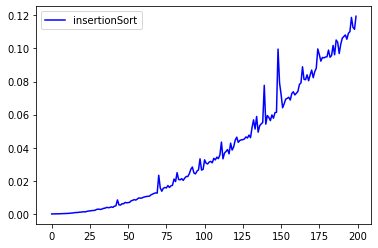

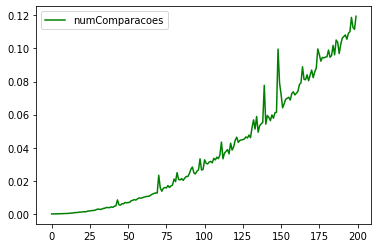

In [78]:
def insertionSort(arranjo):
  numComparacao = 0
  for j in range(1, len(arranjo)):
    numComparacao+=1 
    chave = arranjo[j]
    i=j-1
    while i>=0 and arranjo[i]>chave:
      numComparacao+=1 
      arranjo[i+1]=arranjo[i]
      i=i-1 

    arranjo[i+1]=chave
    numComparacao+=1
  return arranjo, numComparacao

# grafico insertionSort para casos aleatorios 
aux = []
aux2 = [] 
for i in range (5, 1001, 5):  
  A = geraArranjoAleatorio(i)
  aux.append(tempo(insertionSort, A)) 
  aux2.append(insertionSort(A)[1])
  
plt.plot(aux, 'b', label='insertionSort')
plt.legend()
plt.show() 

plt.plot(aux, 'g', label='numComparacoes')
plt.legend() 
plt.show()



##  Merge Sort


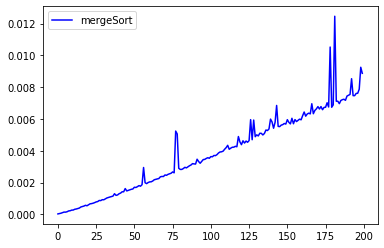

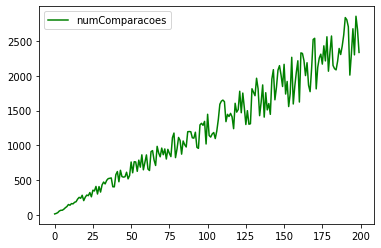

In [79]:
def mergeSort(arr):
  numComparacao = 0
  if len(arr) > 1:
    numComparacao+=1
    mid = len(arr)//2

    L = arr[:mid]

    R = arr[mid:]

    mergeSort(L)

    mergeSort(R)

    i = j = k = 0

    while i < len(L) and j < len(R):
      numComparacao+=1 
      if L[i] < R[j]:
        numComparacao+=1 
        arr[k] = L[i]
        i += 1
      else:
        numComparacao+=1 
        arr[k] = R[j]
        j += 1
      k += 1
      numComparacao+=1 

    while i < len(L):
      numComparacao+=1 
      arr[k] = L[i]
      i += 1
      k += 1
      numComparacao+=1 
    
    while j < len(R):
      numComparacao+1 
      arr[k] = R[j]
      j += 1
      k += 1
      numComparacao+=1

  return arr, numComparacao

# mergeSort Casos Aleatorios
aux = []
aux2 = []
for i in range (5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  aux.append(tempo(mergeSort, A))
  aux2.append(mergeSort(A)[1])

plt.plot(aux, 'b', label='mergeSort')
plt.legend()
plt.show() 

plt.plot(aux2, 'g', label='numComparacoes')
plt.legend()
plt.show()

##  Selection Sort


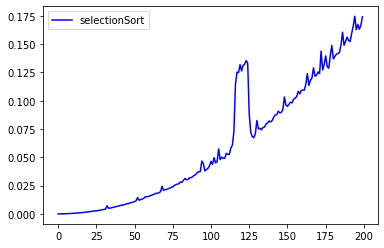

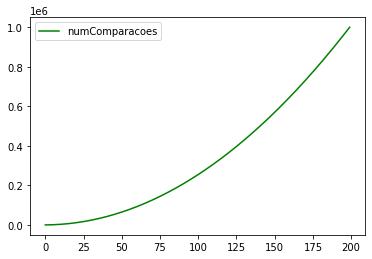

In [80]:
def selectionSort(arranjo):
  numComparacao = 0
  for i in range(len(arranjo)):
    numComparacao+1 
    menor_i = i

    for j in range(i+1, len(arranjo)):      
      numComparacao+=1 
      if arranjo[menor_i] > arranjo[j]:
        numComparacao+=1 
        menor_i = j

      numComparacao+=1 
    arranjo[i], arranjo[menor_i] = arranjo[menor_i], arranjo[i]
  
    numComparacao+=1 
  return arranjo, numComparacao

# selectionSort Casos Aleatorios 
aux = []
aux2 = []
for i in range (5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  aux.append(tempo(selectionSort, A))
  aux2.append(selectionSort(A)[1])

plt.plot(aux, 'b', label='selectionSort')
plt.legend()
plt.show() 

plt.plot(aux2, 'g', label='numComparacoes')
plt.legend()
plt.show()

##  Bubble Sort


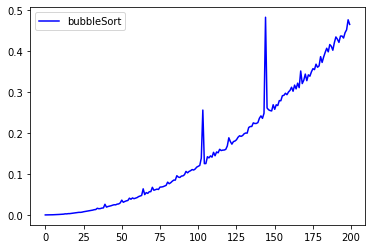

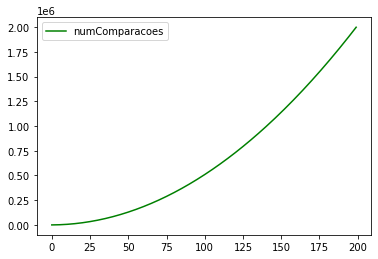

In [81]:
def bubbleSort(arranjo):
  numComparacao = 0 
  for i in range(len(arranjo)):
    numComparacao+=1  
    for j in range(len(arranjo) - 1): 
      numComparacao+=1 
      if (arranjo[j] > arranjo[j+1]):
        numComparacao+=1  
        temp = arranjo[j+1]
        arranjo[j+1] = arranjo[j] 
        arranjo[j] = temp
      numComparacao+=1 
  numComparacao+=1 

  return arranjo, numComparacao

# bubbleSort Casos Aleatorios
aux = [] 
aux2 = []
for i in range (5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  aux.append(tempo(bubbleSort, A))
  aux2.append(bubbleSort(A)[1])

plt.plot(aux, 'b', label='bubbleSort')
plt.legend()
plt.show() 

plt.plot(aux2, 'g', label='numComparacoes')
plt.legend()
plt.show()

## Heap Sort

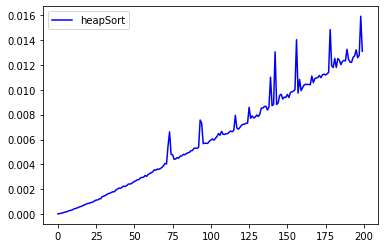

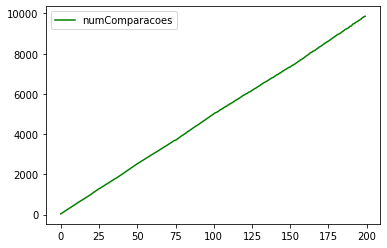

In [82]:
def max_heapify(arr, n, i,numComparacao):
  
  largest = i  
  l = 2 * i + 1     
  r = 2 * i + 2     

  if l < n and arr[largest] < arr[l]:
    numComparacao+=1 
    largest = l
  numComparacao+=1 

  if r < n and arr[largest] < arr[r]:
    numComparacao+=1 
    largest = r
  numComparacao+=1 

  if largest != i:
    numComparacao+=1 
    arr[i], arr[largest] = arr[largest], arr[i] 
    max_heapify(arr, n, largest, numComparacao)

  numComparacao+=1
  return numComparacao
  
def heapSort(arr):
  n = len(arr)
  numComparacao = 0
  
  for i in range(n//2 - 1, -1, -1):
    numComparacao+=1
    numComparacao = max_heapify(arr, n, i, numComparacao)
  numComparacao+=1
  for i in range(n-1, 0, -1):
    numComparacao+=1
    arr[i], arr[0] = arr[0], arr[i]  
    numComparacao = max_heapify(arr, i, 0, numComparacao)
  numComparacao+=1
  
  return arr, numComparacao

# heapSort Casos Aleatorios
aux = [] 
aux2 = []

for i in range (5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  aux.append(tempo(heapSort, A))
  aux2.append(heapSort(A)[1])

plt.plot(aux, 'b', label='heapSort')
plt.legend()
plt.show() 

plt.plot(aux2, 'g', label='numComparacoes')
plt.legend()
plt.show()

## Quick Sort

> pivo = *A[A-comprimento]*

In [83]:
def tempoQuick(arranjo):
  compara = 0 
  ini= time.time()
  compara=(quickSort(A,0, len(A)-1, compara))
  fim = time.time()
  tempo_exec=fim-ini
  return tempo_exec, compara

In [84]:
def particao(arranjo,p,r, comparacao):
  pivo = arranjo[r]
  i = p 
  for j in range(p, r):
    comparacao+=1 
    if arranjo[j]<=pivo:
      comparacao+=1 
      aux = arranjo[i]
      arranjo[i] = arranjo[j]
      arranjo[j] = aux
      i+=1
      
    comparacao+=1 
  aux = arranjo[i]
  arranjo[i] = arranjo[r]
  arranjo[r] = aux
  return i, comparacao

def quickSort(arranjo,p,r, comparacao):
  if p < r:
    comparacao+=1 
    q, comparacao = particao(arranjo,p,r, comparacao)
    quickSort(arranjo,p,q-1, comparacao)
    quickSort(arranjo,q+1,r, comparacao)
  comparacao+=1 
  return comparacao



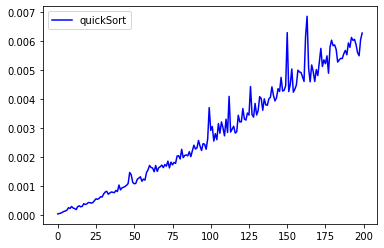

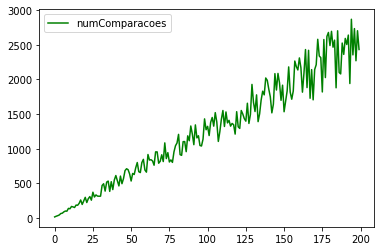

In [85]:

# quickSort Casos aleatorios
aux = []
aux2 = []

for i in range (5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  resultado = tempoQuick(A)
  aux.append(resultado[0])
  aux2.append(resultado[1])

plt.plot(aux, 'b', label='quickSort')
plt.legend()
plt.show() 

plt.plot(aux2, 'g', label='numComparacoes')
plt.legend()
plt.show()

# Análise Melhor / Pior Caso

> Espaço onde foi implementado os arranjos de melhor/pior caso dos algoritmos de ordenação. 

In [58]:
def geraArrayDeTempos(n_elementos,tipo_array, metodo):
  aux = [] 
  aux2 =[]
  for i in range(n_elementos):
    Array=tipo_array(i)
    aux.append(tempo(metodo,Array))
    aux2.append(metodo(Array)[1],)

  return aux, aux2

In [12]:
def geraArranjoPiorCaso(n_elementos):
  B=[]
  B=np.arange(n_elementos)
  B=B[::-1]
  return B

## Insertion Sort - Melhor / Pior caso


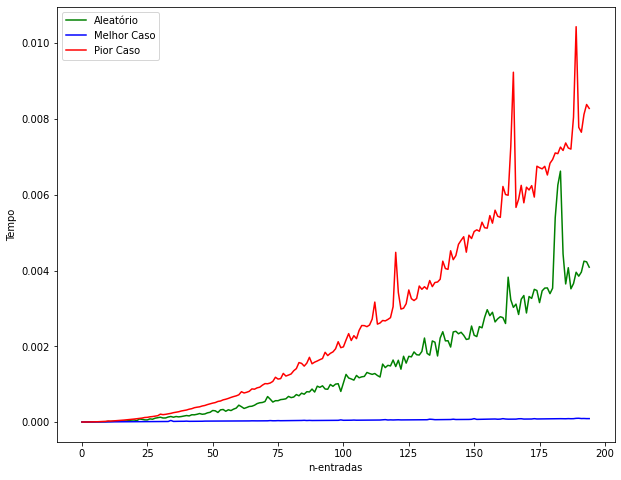

In [26]:
plt.figure(figsize=(10,8))

for i in range (5, 200, 5):

  temposAleatorios=geraArrayDeTempos(i,geraArranjoAleatorio,insertionSort)
  temposmelhorcaso=geraArrayDeTempos(i,np.arange,insertionSort)
  tempospiorcaso=geraArrayDeTempos(i,geraArranjoPiorCaso,insertionSort)

plt.plot(temposAleatorios[0],'g',label="Aleatório")
plt.plot(temposmelhorcaso[0],'b',label="Melhor Caso")
plt.plot(tempospiorcaso[0],'r', label="Pior Caso")
plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()



## Merge Sort - Melhor / Pior caso


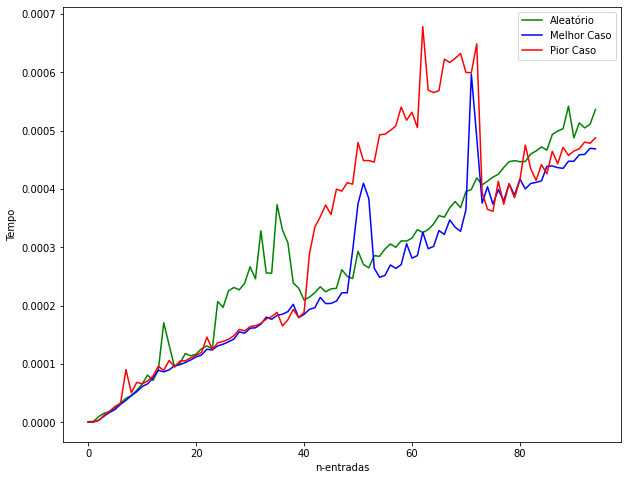

In [62]:
plt.figure(figsize=(10,8))

for i in range (5, 100, 5):

  temposAleatorios=geraArrayDeTempos(i,geraArranjoAleatorio,mergeSort)
  temposmelhorcaso=geraArrayDeTempos(i,np.arange,mergeSort)
  tempospiorcaso=geraArrayDeTempos(i,geraArranjoPiorCaso,mergeSort)

plt.plot(temposAleatorios[0],'g',label="Aleatório")
plt.plot(temposmelhorcaso[0],'b',label="Melhor Caso")
plt.plot(tempospiorcaso[0],'r', label="Pior Caso")
plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()





## Selection Sort - Melhor / Pior caso 

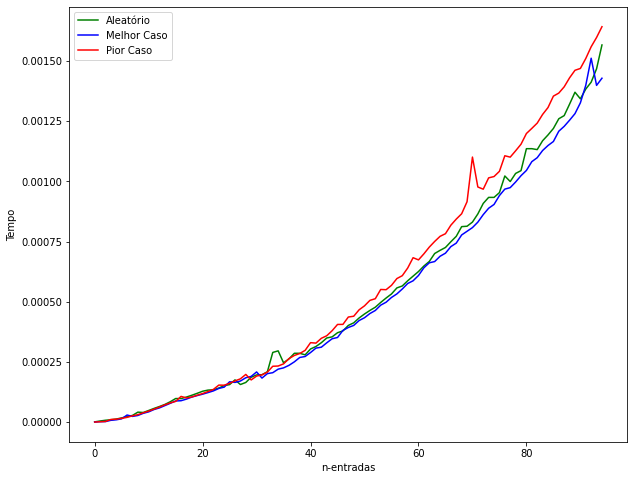

In [63]:
plt.figure(figsize=(10,8))

for i in range (5, 100, 5):

  temposAleatorios=geraArrayDeTempos(i,geraArranjoAleatorio,selectionSort)
  temposmelhorcaso=geraArrayDeTempos(i,np.arange,selectionSort)
  tempospiorcaso=geraArrayDeTempos(i,geraArranjoPiorCaso,selectionSort)

plt.plot(temposAleatorios[0],'g',label="Aleatório")
plt.plot(temposmelhorcaso[0],'b',label="Melhor Caso")
plt.plot(tempospiorcaso[0],'r', label="Pior Caso")
plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()







## Bubble Sort - Melhor / Pior caso

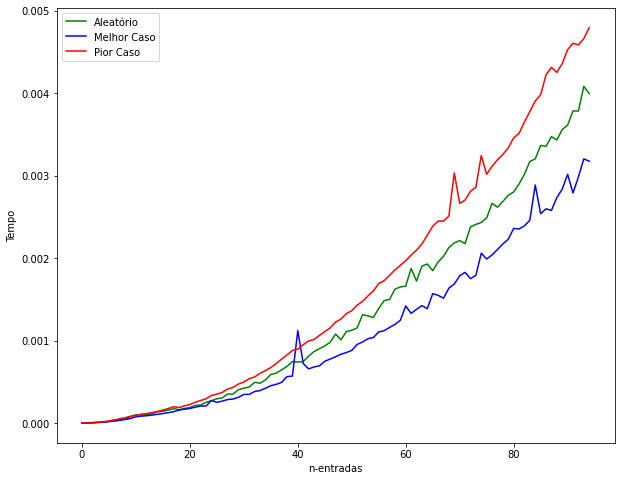

In [64]:
plt.figure(figsize=(10,8))

for i in range (5, 100, 5):

  temposAleatorios=geraArrayDeTempos(i,geraArranjoAleatorio,bubbleSort)
  temposmelhorcaso=geraArrayDeTempos(i,np.arange,bubbleSort)
  tempospiorcaso=geraArrayDeTempos(i,geraArranjoPiorCaso,bubbleSort)

plt.plot(temposAleatorios[0],'g',label="Aleatório")
plt.plot(temposmelhorcaso[0],'b',label="Melhor Caso")
plt.plot(tempospiorcaso[0],'r', label="Pior Caso")
plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()






## Heap sort - Melhor / Pior caso

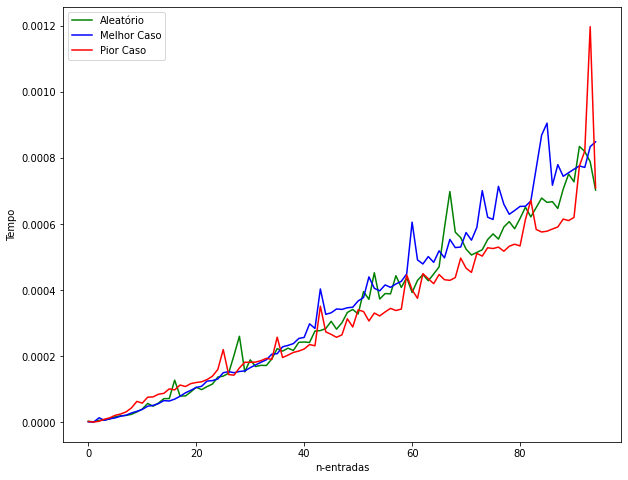

In [69]:
plt.figure(figsize=(10,8))

for i in range (5, 100, 5):

  temposAleatorios=geraArrayDeTempos(i,geraArranjoAleatorio,heapSort)
  temposmelhorcaso=geraArrayDeTempos(i,np.arange,heapSort)
  tempospiorcaso=geraArrayDeTempos(i,geraArranjoPiorCaso,heapSort)

plt.plot(temposAleatorios[0],'g',label="Aleatório")
plt.plot(temposmelhorcaso[0],'b',label="Melhor Caso")
plt.plot(tempospiorcaso[0],'r', label="Pior Caso")
plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()




## Quick sort - Melhor / Pior caso 

In [52]:
def geraArrayDeTemposQuick(n_elementos,tipo_array):
  aux = [] 
  aux2 =[]

  for i in range(n_elementos):
    Array=tipo_array(i)
    resultado = tempoQuick(Array)
    aux.append(resultado[0])
    #aux2.append(tempoQuick(Array)[1],)

  return aux, aux2

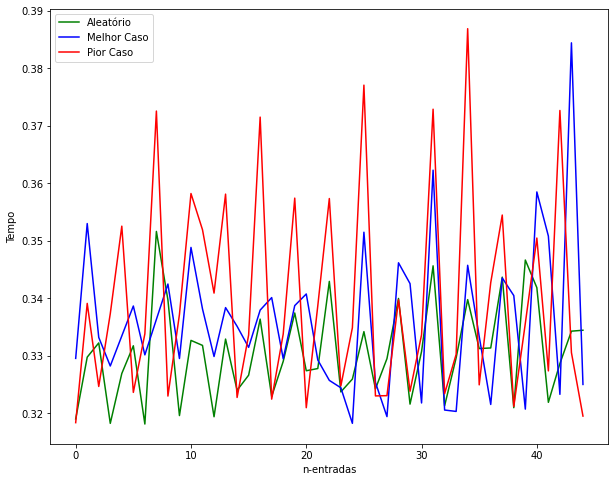

In [54]:
plt.figure(figsize=(10,8))

for i in range (5, 100, 5):

  temposAleatorios=geraArrayDeTemposQuick(i,geraArranjoAleatorio)
  temposmelhorcaso=geraArrayDeTemposQuick(i,np.arange)
  tempospiorcaso=geraArrayDeTemposQuick(i,geraArranjoPiorCaso)

plt.plot(temposAleatorios[0],'g',label="Aleatório")
plt.plot(temposmelhorcaso[0],'b',label="Melhor Caso")
plt.plot(tempospiorcaso[0],'r', label="Pior Caso")
plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()




# Comparação - Melhor Caso

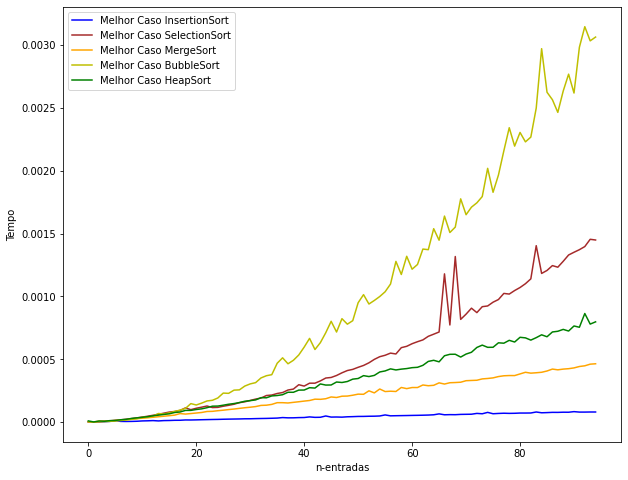

In [62]:
plt.figure(figsize=(10,8))


#Grafico comparacao dos melhores casos entre os algoritmos 

for i in range (5, 100, 5):
  temposMelhorCasoInsertion=geraArrayDeTempos(i,np.arange,insertionSort)
  temposMelhorCasoSelection=geraArrayDeTempos(i,np.arange,selectionSort)
  temposMelhorCasoMerge=geraArrayDeTempos(i,np.arange,mergeSort)
  temposMelhorCasoBubble=geraArrayDeTempos(i,np.arange,bubbleSort)
  temposMelhorCasoHeap=geraArrayDeTempos(i,np.arange,heapSort)
  #temposmelhorcasoQuick=geraArrayDeTemposQuick(i,np.arange)

plt.plot(temposMelhorCasoInsertion[0],'b',label="Melhor Caso InsertionSort")
plt.plot(temposMelhorCasoSelection[0],'brown',label="Melhor Caso SelectionSort")
plt.plot(temposMelhorCasoMerge[0],'orange',label="Melhor Caso MergeSort")
plt.plot(temposMelhorCasoBubble[0],'y',label="Melhor Caso BubbleSort")
plt.plot(temposMelhorCasoHeap[0],'green',label="Melhor Caso HeapSort")
#plt.plot(temposmelhorcasoQuick[0],'black',label="Melhor Caso QuickSort")

plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()





# Comparação - Pior custo

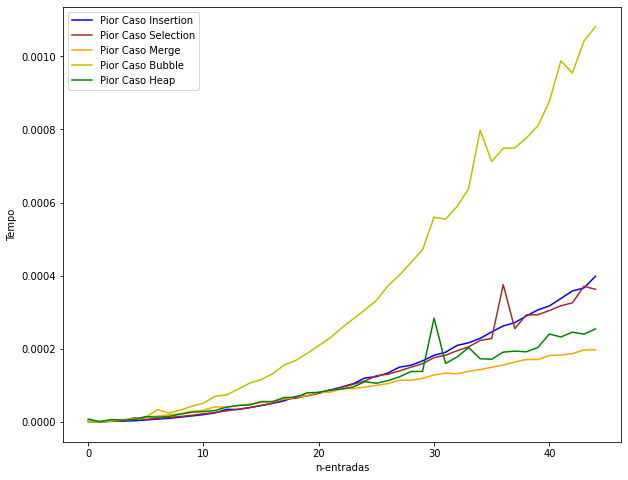

In [69]:
#Gráfico comparação entre algoritmos para os piores casos

plt.figure(figsize=(10,8))

for i in range (5,100,5):
  temposPiorCasoInsertion=geraArrayDeTempos(i,geraArranjoPiorCaso,insertionSort)
  temposPiorCasoSelection=geraArrayDeTempos(i,geraArranjoPiorCaso,selectionSort)
  temposPiorCasoMerge=geraArrayDeTempos(i,geraArranjoPiorCaso,mergeSort)
  temposPiorCasoBubble=geraArrayDeTempos(i,geraArranjoPiorCaso,bubbleSort)
  temposPiorCasoHeap=geraArrayDeTempos(i,geraArranjoPiorCaso,heapSort)
  #tempospiorcasoQuick=geraArrayDeTemposQuick(i,geraArranjoPiorCaso)


plt.plot(temposPiorCasoInsertion[0],'b', label="Pior Caso Insertion")
plt.plot(temposPiorCasoSelection[0],'brown', label="Pior Caso Selection")
plt.plot(temposPiorCasoMerge[0],'orange', label="Pior Caso Merge")
plt.plot(temposPiorCasoBubble[0],'y', label="Pior Caso Bubble")
plt.plot(temposPiorCasoHeap[0],'green', label="Pior Caso Heap")
#plt.plot(tempospiorcasoQuick[0],'black', label="Pior Caso Quick")

plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()


# Comparação Casos Aleatórios

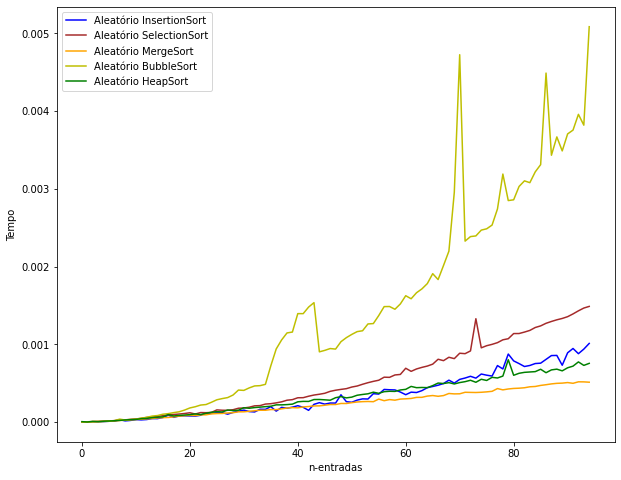

In [70]:
plt.figure(figsize=(10,8))


#Grafico comparacao entre algoritmos para os casos aleatórios 

for i in range (5, 100, 5):
  temposAleatoriosInsertion=geraArrayDeTempos(i,geraArranjoAleatorio,insertionSort)
  temposAleatoriosSelection=geraArrayDeTempos(i,geraArranjoAleatorio,selectionSort)
  temposAleatoriosMerge=geraArrayDeTempos(i,geraArranjoAleatorio,mergeSort)
  temposAleatoriosBubble=geraArrayDeTempos(i,geraArranjoAleatorio,bubbleSort)
  temposAleatoriosHeap=geraArrayDeTempos(i,geraArranjoAleatorio,heapSort)
  #temposAleatoriosQuick=geraArrayDeTempos(i,geraArranjoAleatorio,quickSort)


plt.plot(temposAleatoriosInsertion[0],'b',label="Aleatório InsertionSort")
plt.plot(temposAleatoriosSelection[0],'brown',label="Aleatório SelectionSort")
plt.plot(temposAleatoriosMerge[0],'orange',label="Aleatório MergeSort")
plt.plot(temposAleatoriosBubble[0],'y',label="Aleatório BubbleSort")
plt.plot(temposAleatoriosHeap[0],'green',label="Aleatório HeapSort")
#plt.plot(temposAleatoriosQuick[0],'black',label="Aleatório QuickSort")

plt.xlabel('n-entradas')
plt.ylabel('Tempo')
plt.legend()
plt.show()


# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)

>> 1) **Insertion Sort:**  Para o melhor caso, que é quando o arranjo já está corretamente ordenado, o comportamento assintótico é uma função linear de n. Visto que quando executar o loop do while, A[i] <= j sempre, dessa forma nunca irá entrar dentro do loop e ele irá executar n vezes. Para o pior caso, que é quando o arranjo está inversamente ordenado (descrescente) o comportamento assintótico é uma função quadrática de n. Visto que ele terá que comparar cada elemento A[j] com o todos os elementos do subarranjo já ordenado inteiro, resultando em uma execucção n². Em alguns casos, o caso médio pode ser tão ruim quanto o pior caso, mas ele é limitado superiomente pelo pior caso, sendo assim, o caso médio não passa de função quadrática de n. **Por tanto, podemos dizer que o insertion Sort tem uma execução de 𝚯(𝒏²)**.

>> 2) **Merge Sort: **Pior caso: 𝑇(𝑛)
• Divisão: A etapa de divisão simplesmente calcula o ponto médio do
subarranjo, o que demora um tempo constante. Portanto, 𝑫(𝒏) = 𝚯(𝟏).
• Conquista: Resolvemos recursivamente dois subproblemas, cada um de
tamanho 𝒏/𝟐, o que contribui com 𝟐𝑻(𝒏/𝟐) para o tempo de execução.
• Combinação: Já observamos que o procedimento 𝑴𝒆𝒓𝒈𝒆 em um subarranjo
de n elementos leva o tempo 𝚯(𝒏); assim, 𝑪(𝒏) = 𝚯(𝒏).

>> 3) **Selection Sort:** Melhor caso é o vetor já ordenado e o pior caso é o vetor em ordem inversa (decrescente). Para o melhor caso podemos expressar o tempo de execução como uma função linear de n, enquanto no pior caso é um função quadrática de n. Sendo assim, podemos dizer que a taxa de crescimento desse algoritmo é **𝚯(𝒏²).**

>> 4) **Bubble Sort:** O melhor caso acontece com a entrada em ordem crescente. Sendo assim, a execução será uma função linear de n². Pois ele irá rodar os dois loops mas nunca irá entrar no if. Sendo assim, tempo de execução no melhor é n². Para o pior caso, que é quando o arranjo está em ordem descrescente, o tempo também será n². Visto que ele permanecerá fazendo os dois loops. Sendo assim, podemos dizer o que bubble sort é O(n²).  

>> 5) **Heap Sort:** O pior caso de um heap sort ocorre quando a última linha da árvore está exatamente metade cheia. Cada chamada de MAX-HEAPIFY custa o tempo O(lg n). A função heap executa O(n) dessas chamdas, por tanto, o tempo de execução é **O(n lg n).** 

>> 6) **Quick Sort:** O tempo de execução do quick sort depende se o particionamento é balanceado ou não, caso o particionamento seja balanceado temos o melhor caso que é assintoticamente tão rápido quanto a ordenação por intercalação. E temos que o particionamento no melhor caso é T(n) = 2T(n/2) + 𝚯(n). A solução dessa recorrência é T(n) = 𝚯(n log n). O pior caso é quando o particionamento não é balanceado e nesse caso, ele é tão lento quanto a ordenação por inserção. Esse pior caso ocorre quando a rotina de participnamento gera um subproblema com n-1 elementos e um com 0 elementos a cada chamada recursiva e o particionamento custa um tempo de 𝚯(n). A chamada recursiva então retorna um T(0) = 𝚯(1) e T(n) = T(n - 1) + T(0) + 𝚯(n) = T(n - 1) + 𝚯(n). Somando os custos em cada nível da recursão, a série aritmética obtida chega a 𝚯(n²). Para casos aleatórios, o quick sort aproximasse mais do melhor caso do que do pior e nesse, podemos dizer que o custo total do quick sort é **O(n lg n).**


**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



### Quick Sort Aleatorio

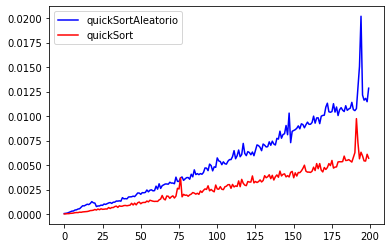

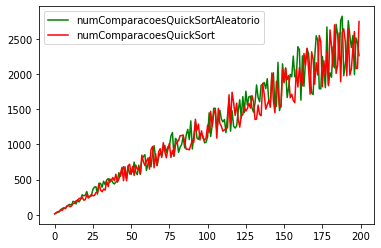

In [91]:
def partition(arranjo,p,r, numComparacao):

  pivo = arranjo[np.random.randint(0, r)]
  i = p 
  for j in range(p, r):
    numComparacao+=1
    if arranjo[j]<=pivo:
      numComparacao+=1 
      aux = arranjo[i]
      arranjo[i] = arranjo[j]
      arranjo[j] = aux
      i+=1
      
    numComparacao+=1 
  numComparacao+=1 
  aux = arranjo[i]
  arranjo[i] = arranjo[r]
  arranjo[r] = aux
  return i, numComparacao


def quickSortAleatorio(arranjo,p,r, numComparacao):
  if p < r:
    numComparacao+=1 
    q, numComparacao = partition(arranjo,p,r, numComparacao)
    quickSortAleatorio(arranjo,p,q-1, numComparacao)
    quickSortAleatorio(arranjo,q+1,r, numComparacao)

  return numComparacao 

def tempoQuickAleatorio(arranjo):
  ini= time.time()
  compara = 0 
  compara=(quickSortAleatorio(A,0, len(A)-1, compara))
  fim = time.time()
  tempo_exec=fim-ini
  return tempo_exec, compara 

# quickSort Casos aleatorios
aux = []
aux2 = []
aux3 = []
aux4 = [] 

for i in range (5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  resultado = tempoQuickAleatorio(A)
  aux.append(resultado[0])
  aux2.append(resultado[1])

for i in range(5, 1001, 5): 
  A = geraArranjoAleatorio(i)
  resultado = tempoQuick(A)
  aux3.append(resultado[0])
  aux4.append(resultado[1])

plt.plot(aux, 'b', label='quickSortAleatorio')
plt.plot(aux3, 'r', label='quickSort')
plt.legend()
plt.show() 

plt.plot(aux2, 'g', label='numComparacoesQuickSortAleatorio')
plt.plot(aux4, 'r', label='numComparacoesQuickSort')
plt.legend()
plt.show()

In [ ]:
print("Boa sorte!!!")

Boa sorte!!!
